In [0]:
# MNIST DNN using Tensorflow
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf

# Note that keras and tf.keras are different
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

print('Tensorflow ',tf.__version__, '/ Keras ', tf.keras.__version__)

Tensorflow  1.14.0 / Keras  2.2.4-tf


In [0]:
# Load MNIST dataset
digits = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = digits.load_data()

print('Shape = ', train_images.shape)  #MNIST image size = 28*28
print('Train set length = ',len(train_images))
print('Test set length = ',len(test_images))

Shape =  (60000, 28, 28)
Train set length =  60000
Test set length =  10000


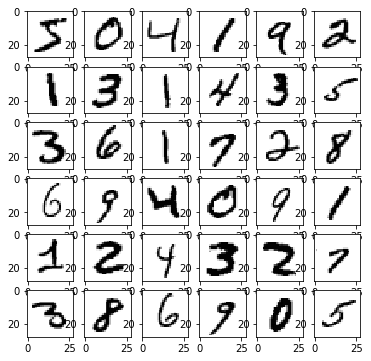

In [0]:
# Preprocessing
# 0~255 scale to 0~1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Show images
plt.figure(figsize=(6,6))
for i in range(36):
    plt.grid(False)
    plt.subplot(6,6,i+1)
    plt.imshow(train_images[i], cmap=cm.gray_r, interpolation='nearest')
plt.show()

In [0]:
# Design model (DNN)
#'''
# 2-layer DNN
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),       # input layer = 28*28 = 784
    Dense(800, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)  # output softmax layer
])

#''';
'''
# 6-layer DNN
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),       # input layer = 28*28 = 784
    Dense(2500, activation=tf.nn.relu),
    Dense(2000, activation=tf.nn.relu),
    Dense(1500, activation=tf.nn.relu),
    Dense(1000, activation=tf.nn.relu),
    Dense(500, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)  # output softmax layer
])
''';

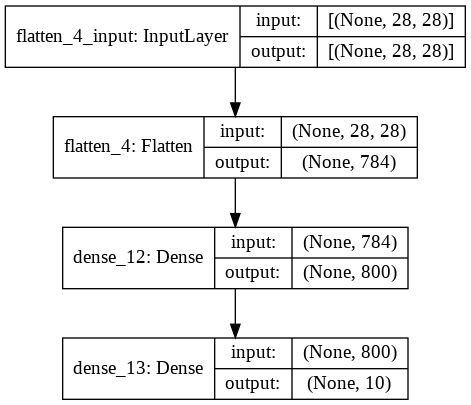

In [0]:
# Compile model
#'''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#''';

'''
sgd = tf.keras.optimizers.SGD(lr=0.1, decay=0.00022, momentum=0.5)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
''';

# Visualize model
tf.keras.utils.plot_model(model, show_shapes=True)

In [0]:
# Train model
train_history = model.fit(train_images, train_labels,
                          validation_data=(test_images, test_labels),
                          epochs=5,
                          #verbose=0,
                          batch_size=100
                         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2327 - acc: 0.9339 - val_loss: 0.1160 - val_acc: 0.9658
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0909 - acc: 0.9737 - val_loss: 0.0824 - val_acc: 0.9743
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0566 - acc: 0.9831 - val_loss: 0.0719 - val_acc: 0.9761
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0401 - acc: 0.9879 - val_loss: 0.0588 - val_acc: 0.9817
Epoch 5/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0281 - acc: 0.9915 - val_loss: 0.0621 - val_acc: 0.9798


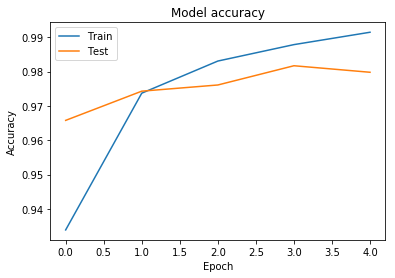

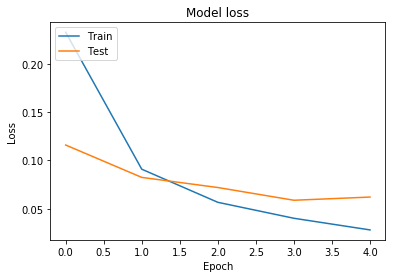

In [0]:
# Plot training history
# Accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

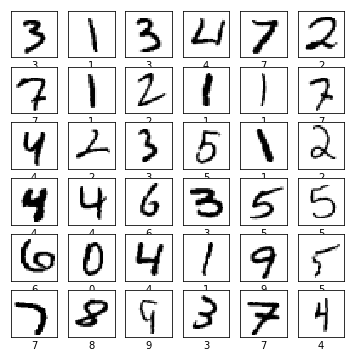

In [0]:
# Prediction
predictions = model.predict(test_images)

offset = 30
plt.figure(figsize=(6,6))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[offset+i], cmap=cm.gray_r, interpolation='nearest')
    predicted = np.argmax(predictions[offset+i])
    
    color = 'black'
    if test_labels[offset+i] != predicted:
        color = 'red'
    plt.xlabel(predicted, color=color)
plt.show()